In [407]:
import pandas as pd

In [408]:
cor_data = pd.read_csv('nlp_corpus.tsv',sep='\t')

In [409]:
cor_data['description'] = cor_data.apply(lambda x : x['description'].split('.') ,axis=1)
cor_data['filename'] = cor_data.apply(lambda x : int(x['filename'][:-4]),axis=1)

In [410]:
cor_data

,filename,description
0,0,[She is a Westerner who appears to be in her 3...
1,0,"[She looks like 30-year-old, She has medium r..."
2,0,"[She is a middle-aged Western woman, She has ..."
3,1,"[Looking middle-aged, he has grayish brown hai..."
4,1,"[He looks like 40-year-old, He has thick flat..."
...,...,...
1045,348,"[He is an oriental middle-aged man, He has be..."
1046,348,"[He is a middle-aged man, He has deep eyes an..."
1047,349,"[She looks like late 20s to early 30s, It is ..."
1048,349,"[She is a middle-aged Western woman, She has ..."


In [411]:
cor_sum = cor_data.groupby(cor_data['filename'])['description'].sum()
cor_sum = pd.DataFrame(cor_sum)

In [412]:
cor_sum

,description
filename,
0,[She is a Westerner who appears to be in her 3...
1,"[Looking middle-aged, he has grayish brown hai..."
2,"[He looks like an Asian in his 30s, It's brow..."
3,"[He looks like a Westerner in his twenties, I..."
4,"[She looks like a Western in her thirties, It..."
...,...
345,"[She looks like early 50s, Her eyebrows are s..."
346,"[He looks like mid to late 40s, He has medium..."
347,"[He looks like mid to late 40s, His eyebrows ..."


In [413]:
col_list = ['eyes','nose', 'lips', 'hair'] #skin, teeth

In [414]:
from collections import defaultdict

cor_dict_eyes = defaultdict(list)
cor_dict_nose = defaultdict(list)
cor_dict_lips = defaultdict(list)
cor_dict_hair = defaultdict(list)

#기준 얼굴 위에서부터 아래로
cor_dict = [cor_dict_eyes, cor_dict_nose, cor_dict_lips, cor_dict_hair]

In [415]:
for cnt, i in enumerate(cor_dict):
    temp = cor_sum.apply(lambda x : [i if col_list[cnt] in i else '' for i in x['description']],axis=1)
    
    for ind, j in enumerate(temp):
        i[ind] += list(filter(None, j))

In [416]:
trash = []
for cor in cor_dict:
    cnt=0
    for ind, i in enumerate(cor.values()):
        if len(i)==0:
            cnt+=1
            trash.append(ind)
    print(cnt)

0
2
2
0


In [424]:
trash = sorted(trash)
trash

[182, 184, 186, 197]

In [418]:
all_corpus = defaultdict(list)

for i in range(350):
    print(i)
    if i not in trash:
        for eyes in cor_dict_eyes[i]:
            for nose in cor_dict_nose[i]:
                for lips in cor_dict_lips[i]:
                    for hair in cor_dict_hair[i]:
                        all_corpus[i].append(eyes+' /'+nose+' /'+lips+' /'+hair)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [419]:
all_corpus[0]

[' She has big prominent hazel eyes / She has a high nose with a slight view of her nostrils / She has bow shaped lips / It has long brown straight hair',
 ' She has big prominent hazel eyes / She has a high nose with a slight view of her nostrils / She has bow shaped lips / She has long straight light reddish-brown hair',
 ' She has big prominent hazel eyes / She has a high nose with a slight view of her nostrils / She has bow shaped lips / She has round medium forehead and brown long straight hair',
 ' She has big prominent hazel eyes / She has a high nose with a slight view of her nostrils / She has bow shaped lips / She parts her hair at the side',
 ' She has big prominent hazel eyes / She has a high nose with a slight view of her nostrils / She has a big mouth and thin and deep red lips / It has long brown straight hair',
 ' She has big prominent hazel eyes / She has a high nose with a slight view of her nostrils / She has a big mouth and thin and deep red lips / She has long stra

In [420]:
# 총  corpus 크기

cnt = 0
for i in all_corpus.values():
    cnt+=len(i)
    
print(cnt)

47546


In [292]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [293]:
# 최종 버전
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) /
                            tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])

        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        angle_rads = np.zeros(angle_rads.shape)
        angle_rads[:, 0::2] = sines
        angle_rads[:, 1::2] = cosines
        pos_encoding = tf.constant(angle_rads)
        pos_encoding = pos_encoding[tf.newaxis, ...]

        print(pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

(1, 50, 128)


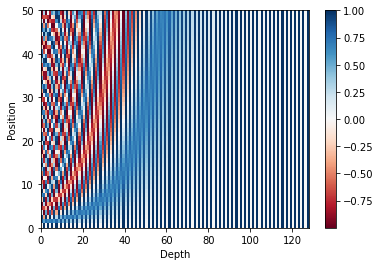

In [294]:
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [295]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장 길이)

    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)

    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value)

    return output, attention_weights

In [296]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads

        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)

    # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, query의 문장 길이, d_model)
        # k : (batch_size, key의 문장 길이, d_model)
        # v : (batch_size, value의 문장 길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(
            query, key, value, mask)
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)

        return outputs

In [297]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]

In [298]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs, 'key': inputs, 'value': inputs,  # Q = K = V
            'mask': padding_mask  # 패딩 마스크 사용
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)

    # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [299]:
# @@@@수정됨
def encoder(vocab_size, num_layers, dff, d_model, num_heads, dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
                                dropout=dropout, name="encoder_layer_{}".format(
                                    i),
                                )([outputs, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [300]:
# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - \
        tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)  # 패딩 마스크도 포함
    return tf.maximum(look_ahead_mask, padding_mask)

In [301]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs, 'key': inputs, 'value': inputs,  # Q = K = V
            'mask': look_ahead_mask  # 룩어헤드 마스크
        })

    # 잔차 연결과 층 정규화
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1, 'key': enc_outputs, 'value': enc_outputs,  # Q != K = V
            'mask': padding_mask  # 패딩 마스크
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [302]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
                                dropout=dropout, name='decoder_layer_{}'.format(
                                    i),
                                )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [303]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
                          d_model=d_model, num_heads=num_heads, dropout=dropout,
                          )(inputs=[inputs, enc_padding_mask])  # 인코더의 입력은 입력 문장과 패딩 마스크

    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
                          d_model=d_model, num_heads=num_heads, dropout=dropout,
                          )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(
        units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [304]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [305]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

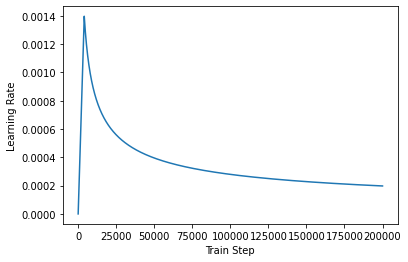

In [306]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [307]:
import pandas as pd
import urllib.request
import tensorflow_datasets as tfds
import tensorflow as tf
import time
import numpy as np
import matplotlib.pyplot as plt
import re

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [425]:
sample_vector = pd.read_csv('sample.csv')
sample_vector.drop('Unnamed: 0',axis=1,inplace=True)

In [426]:
temp_ls = []

for i in sample_vector.columns:
    temp_ls.append(i[:-4])

In [427]:
sample_vector.columns = temp_ls

In [428]:
sample_vector = sample_vector.reindex(sorted(sample_vector.columns, key=lambda x: int(x[0:])), axis=1)

In [430]:
for i in trash:
    try:
        sample_vector.drop(str(i),axis=1,inplace=True)
    except:
        print('err')

In [431]:
sample_vector = sample_vector.round(5)

In [433]:
trash2 = []
cnt = 0

for i in sample_vector.columns:
    if (int(i) - cnt)!=0:
        if int(i)-1 not in trash:
            trash2.append(int(i)-1)
        cnt+=1
    cnt+=1

In [434]:
trash

[182, 184, 186, 197]

In [435]:
trash2

[116, 172, 310]

In [437]:
for i in trash2:
    del all_corpus[i]

In [439]:
len(all_corpus)

343

In [442]:
sample_vector.shape[1]

343

In [443]:
temp_ls = []

for i in sample_vector:
    temp_str = ''
    for j in sample_vector[i]:
        tt = str(j)
        temp_str+= (tt[2:]+' ')
    temp_ls.append(temp_str)

In [452]:
df = pd.DataFrame(columns=['Q','A','label'])

for ind, (label, i) in enumerate(all_corpus.items()):
    print(label)
    for j in i:
        df = df.append({'Q': temp_ls[ind] ,'A':j,'label':label}, ignore_index=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
173
174
175
176
177
178
179
180
181
183
185
187
188
189
190
191
192
193
194
195
196
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
28

In [453]:
df

,Q,A,label
0,0 00165 1643 08451 0 02431 18528 03026 12749 4...,She has big prominent hazel eyes / She has a ...,0
1,0 00165 1643 08451 0 02431 18528 03026 12749 4...,She has big prominent hazel eyes / She has a ...,0
2,0 00165 1643 08451 0 02431 18528 03026 12749 4...,She has big prominent hazel eyes / She has a ...,0
3,0 00165 1643 08451 0 02431 18528 03026 12749 4...,She has big prominent hazel eyes / She has a ...,0
4,0 00165 1643 08451 0 02431 18528 03026 12749 4...,She has big prominent hazel eyes / She has a ...,0
...,...,...,...
47223,0 05374 34527 10013 0 08394 25937 12561 53052 ...,It also has abundant eyelashes and large gray...,349
47224,0 05374 34527 10013 0 08394 25937 12561 53052 ...,It also has abundant eyelashes and large gray...,349
47225,0 05374 34527 10013 0 08394 25937 12561 53052 ...,It also has abundant eyelashes and large gray...,349
47226,0 05374 34527 10013 0 08394 25937 12561 53052 ...,It also has abundant eyelashes and large gray...,349


In [457]:
for i in df[df['label']==29]['A']:
    print(i)

# 데이터 검증 완료

 He has double eyelids and deep-set eyes / His nose bridge is high and thin / He is smiling with thin pink lips showing his teeth / He has short curly hair without bangs
 He has double eyelids and deep-set eyes / His nose bridge is high and thin / He is smiling with thin pink lips showing his teeth / He has broad forehead and straight hair line
 He has double eyelids and deep-set eyes / His nose bridge is high and thin / He is smiling with thin pink lips showing his teeth / He has dark brown hair with short curly hair that shows off his forehead
 He has double eyelids and deep-set eyes / His nose bridge is high and thin / He is smiling with thin pink lips showing his teeth / He has square wide forehead and short black curly hair
 He has double eyelids and deep-set eyes / His nose bridge is high and thin / He has nude tone of small and bow-shaped lips / He has short curly hair without bangs
 He has double eyelids and deep-set eyes / His nose bridge is high and thin / He has nude tone of

In [458]:
train_data = df

In [42]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv", filename="ChatBotData.csv")

# train_data = pd.read_csv('ChatBotData.csv')
# train_data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [459]:
print('챗봇 샘플의 개수 :', len(train_data))

챗봇 샘플의 개수 : 47228


In [460]:
print(train_data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


In [461]:
questions = []
for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [462]:
answers = []
for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [463]:
len(questions)

47228

In [464]:
print(questions[:5])
print(answers[:5])

['0 00165 1643 08451 0 02431 18528 03026 12749 44168 0 0 0 0 00058 0 08885 0 0 29197 03403 21574 24153 14407 17276 07292 0 -05 0 03017 01031 06048 25635 00159 01998 04566 19999 0 0 0 0 06675 05001 04273 0 12919 01006 00809 0 0972 02437 07413 2496 55501 0 00481 00594 54213 00436 1895 01827 0 01338 04138 04319 27514 09511 1328 2424 00731 0013 00714 20665 29143 30132 0 -05 20101 02664 15666 00329 01953 0806 03616 0 0 0 00267 0395 05954 35079 19341 16655 00057 02627 24388 0 0 12455 06932 00527 0 0 4408 1303 21157 00183 00119 08418 03376 0 34454 01054 01522 01365 77229 02767 102 0 0 23412 04978 16792 27981 14851 0 05353 07829 29764 28984 07116 16532 0 0 02654 15891 54321 00953 06596 0 0 06312 0 00096 38776 01119 0 03267 15816 02925 01482 0664 14446 -05 0 05329 36171 0 23564 0 08908 18879 03525 07259 07379 05899 09201 47079 00167 0 00812 0 00627 23512 39644 0014 0 00596 0 00011 29176 46689 00091 00015 00032 11469 37599 0 0 29991 03203 0 0 32996 0 08316 0 11087 14128 00467 0 02749 00537 37789

In [465]:
# 서브워드텍스트인코더를 사용하여 질문과 답변을 모두 포함한 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [466]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [8136]
종료 토큰 번호 : [8137]
단어 집합의 크기 : 8138


In [467]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('Tokenized sample question: {}'.format(tokenizer.encode(questions[20])))

Tokenized sample question: [1, 3056, 2370, 7912, 925, 2, 1, 880, 2, 2132, 7, 6612, 2633, 3, 5911, 7, 1, 1, 1, 1, 201, 1, 7179, 90, 1, 1, 7135, 8, 1433, 10, 1175, 4, 649, 57, 2924, 8, 2061, 6, 893, 5, 7928, 18, 15, 1, 604, 8, 386, 2, 5339, 4923, 9, 343, 7095, 7912, 415, 6, 4494, 3, 1, 1, 1, 1, 3460, 9, 3312, 419, 10, 1, 350, 5445, 7912, 2905, 2364, 1, 1502, 7912, 880, 8, 468, 10, 1196, 7912, 1107, 45, 1, 3525, 4583, 533, 137, 3590, 6, 1111, 7912, 984, 8, 1, 523, 7, 2942, 7, 1037, 3, 1590, 4, 3530, 2, 4095, 7912, 7841, 7912, 1481, 2, 462, 3767, 6019, 9, 2357, 10, 5953, 5, 7928, 18, 15, 6020, 2, 1181, 4, 4514, 6, 1981, 503, 10, 542, 7912, 504, 6, 1, 1, 1, 7727, 7400, 1779, 4, 276, 125, 6409, 2, 2192, 9, 236, 7534, 7264, 71, 1, 1, 2481, 9, 4820, 5, 3395, 1, 1, 6010, 7912, 1591, 7912, 4075, 8, 2398, 617, 799, 7, 515, 6, 1, 2445, 112, 2980, 1454, 5, 3123, 4714, 78, 1960, 1268, 5, 1, 1, 3755, 5, 1484, 7, 5116, 5, 1330, 2, 3327, 2, 1, 5302, 1457, 3, 7715, 58, 4692, 4, 1098, 6, 1596, 5, 1, 1, 4

In [468]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 decode() 테스트해보기

# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [1, 3056, 2370, 7912, 925, 2, 1, 880, 2, 2132, 7, 6612, 2633, 3, 5911, 7, 1, 1, 1, 1, 201, 1, 7179, 90, 1, 1, 7135, 8, 1433, 10, 1175, 4, 649, 57, 2924, 8, 2061, 6, 893, 5, 7928, 18, 15, 1, 604, 8, 386, 2, 5339, 4923, 9, 343, 7095, 7912, 415, 6, 4494, 3, 1, 1, 1, 1, 3460, 9, 3312, 419, 10, 1, 350, 5445, 7912, 2905, 2364, 1, 1502, 7912, 880, 8, 468, 10, 1196, 7912, 1107, 45, 1, 3525, 4583, 533, 137, 3590, 6, 1111, 7912, 984, 8, 1, 523, 7, 2942, 7, 1037, 3, 1590, 4, 3530, 2, 4095, 7912, 7841, 7912, 1481, 2, 462, 3767, 6019, 9, 2357, 10, 5953, 5, 7928, 18, 15, 6020, 2, 1181, 4, 4514, 6, 1981, 503, 10, 542, 7912, 504, 6, 1, 1, 1, 7727, 7400, 1779, 4, 276, 125, 6409, 2, 2192, 9, 236, 7534, 7264, 71, 1, 1, 2481, 9, 4820, 5, 3395, 1, 1, 6010, 7912, 1591, 7912, 4075, 8, 2398, 617, 799, 7, 515, 6, 1, 2445, 112, 2980, 1454, 5, 3123, 4714, 78, 1960, 1268, 5, 1, 1, 3755, 5, 1484, 7, 5116, 5, 1330, 2, 3327, 2, 1, 5302, 1457, 3, 7715, 58, 4692, 4, 1098, 6, 1596, 5, 1, 1, 4975, 858, 2, 8

In [469]:
# 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위 X 형태소 분석 단위 X
for ts in tokenized_string:
    print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

1 ----> 0 
3056 ----> 00165 
2370 ----> 1643
7912 ---->  
925 ----> 0845
2 ----> 1 
1 ----> 0 
880 ----> 0243
2 ----> 1 
2132 ----> 1852
7 ----> 8 
6612 ----> 03026 
2633 ----> 1274
3 ----> 9 
5911 ----> 4416
7 ----> 8 
1 ----> 0 
1 ----> 0 
1 ----> 0 
1 ----> 0 
201 ----> 00058 
1 ----> 0 
7179 ----> 088
90 ----> 85 
1 ----> 0 
1 ----> 0 
7135 ----> 2919
8 ----> 7 
1433 ----> 0340
10 ----> 3 
1175 ----> 2157
4 ----> 4 
649 ----> 241
57 ----> 53 
2924 ----> 1440
8 ----> 7 
2061 ----> 1727
6 ----> 6 
893 ----> 0729
5 ----> 2 
7928 ----> 0
18 ---->  -
15 ----> 05 
1 ----> 0 
604 ----> 0301
8 ----> 7 
386 ----> 0103
2 ----> 1 
5339 ----> 06048 
4923 ----> 2563
9 ----> 5 
343 ----> 00159 
7095 ----> 01998
7912 ---->  
415 ----> 0456
6 ----> 6 
4494 ----> 1999
3 ----> 9 
1 ----> 0 
1 ----> 0 
1 ----> 0 
1 ----> 0 
3460 ----> 0667
9 ----> 5 
3312 ----> 05001 
419 ----> 0427
10 ----> 3 
1 ----> 0 
350 ----> 12
5445 ----> 919
7912 ---->  
2905 ----> 01006 
2364 ----> 00809 
1 ----> 0 
1502 ---

In [470]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩


def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        tokenized_inputs.append(sentence1)
        tokenized_outputs.append(sentence2)

    # 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs

In [471]:
questions, answers = tokenize_and_filter(questions, answers)

In [472]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (47228, 40)
답변 데이터의 크기(shape) : (47228, 40)


In [473]:
# 0번째 샘플을 임의로 출력
print(questions[0])
print(answers[0])

[   1 1682   10    1 5297    9    1 6446    9 7546    1    1 6476   10
  794    7  265   10    1    1  586    7 1280 4120  636   10 7618    5
 1195 7276 1685   89 4149   10  664 2977    2  859 7931 8137]
[  13   75 2922 6470 7072 2772 8002 6512   29   12   19   13   20  164
   22   40   20 2578 7998 7985 7981 2925   28   30 4136 7995   12   19
   13 4957  159   34   12  208   13  106   39  156   36 8137]


In [474]:
print('단어 집합의 크기(Vocab size): {}'.format(VOCAB_SIZE))
print('전체 샘플의 수(Number of samples): {}'.format(len(questions)))

단어 집합의 크기(Vocab size): 8138
전체 샘플의 수(Number of samples): 47228


In [475]:
# 텐서플로우 dataset을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶는다.
# 또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성한다.
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]  # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [476]:
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

[  13   75 2922 6470 7072 2772 8002 6512   29   12   19   13   20  164
   22   40   20 2578 7998 7985 7981 2925   28   30 4136 7995   12   19
   13 4957  159   34   12  208   13  106   39  156   36 8137]
[[  13   75 2922 6470 7072 2772 8002 6512   29   12   19   13   20  164
    22   40   20 2578 7998 7985 7981 2925   28   30 4136 7995   12   19
    13 4957  159   34   12  208   13  106   39  156   36]]
[[  75 2922 6470 7072 2772 8002 6512   29   12   19   13   20  164   22
    40   20 2578 7998 7985 7981 2925   28   30 4136 7995   12   19   13
  4957  159   34   12  208   13  106   39  156   36 8137]]


In [477]:
tf.keras.backend.clear_session()

# Hyper-parameters
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

(1, 8138, 256)
(1, 8138, 256)


In [478]:
MAX_LENGTH = 40

learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)


def accuracy(y_true, y_pred):
    # ensure labels have shape (batch_size, MAX_LENGTH - 1)
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)


model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [479]:
EPOCHS = 50

model.fit(dataset, epochs=EPOCHS)

Epoch 1/50
738/738 [==============================] - 34s 40ms/step - loss: 4.7476 - accuracy: 0.2618
Epoch 2/50
738/738 [==============================] - 30s 41ms/step - loss: 1.1841 - accuracy: 0.6861
Epoch 3/50
738/738 [==============================] - 30s 41ms/step - loss: 0.3585 - accuracy: 0.8602
Epoch 4/50
738/738 [==============================] - 30s 40ms/step - loss: 0.2128 - accuracy: 0.8928
Epoch 5/50
738/738 [==============================] - 30s 41ms/step - loss: 0.1766 - accuracy: 0.9027
Epoch 6/50
738/738 [==============================] - 30s 41ms/step - loss: 0.1582 - accuracy: 0.9078
Epoch 7/50
738/738 [==============================] - 32s 43ms/step - loss: 0.1330 - accuracy: 0.9147
Epoch 8/50
738/738 [==============================] - 31s 42ms/step - loss: 0.1154 - accuracy: 0.9194
Epoch 9/50
738/738 [==============================] - 32s 43ms/step - loss: 0.1036 - accuracy: 0.9225
Epoch 10/50
738/738 [==============================] - 31s 42ms/step - loss: 0.095

In [480]:
def evaluate(sentence):
    sentence = preprocess_sentence(sentence)

    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    output = tf.expand_dims(START_TOKEN, 0)

    # 디코더의 예측 시작
    for i in range(MAX_LENGTH):
        predictions = model(inputs=[sentence, output], training=False)

        # 현재(마지막) 시점의 예측 단어를 받아온다.
        predictions = predictions[:, -1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 마지막 시점의 예측 단어를 출력에 연결한다.
        # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0)


def predict(sentence):
    prediction = evaluate(sentence)

    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])

    print('Input: {}'.format(sentence))
    print('Output: {}'.format(predicted_sentence))

    return predicted_sentence

In [481]:
def preprocess_sentence(sentence):
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    return sentence

'0 0 16579 09361 0 00826 26325 06437 20831 61515 0 0 0 0 0 0 06281 0 0 23801 0673 2416 23743 20287 22205 05198 0 -05 0 02382 00929 10814 33464 0 0294 06072 30177 0 0 0 0 03152 07751 06991 0 07946 0076 00098 0 14771 0078 05628 38591 81016 0 00304 00036 70095 00907 22624 02339 0 00279 01617 02267 37413 12219 26101 37202 00439 00083 00696 34958 43271 29159 0 0 23851 00372 13509 0004 03592 07026 02918 0 0 0 00183 02463 06279 43822 30789 14806 0008 02262 37092 0 0 10731 1372 00116 0 0 53733 13786 15406 0 00126 07199 02045 0 34985 02901 01782 01374 07548 01507 07472 0 0 29927 07771 2405 31871 25582 0 05097 15137 38561 37553 13762 25099 0 0 03165 12395 68721 0 07121 0 0 0419 0 0 29847 00616 0 03781 21206 04087 00927 08139 25564 0 0 06827 68709 0 34885 0 05892 24543 0175 23582 11773 04774 13258 65141 00666 0 03584 0 00209 36839 51938 -05 0 0063 0 0 35429 6542 -05 00051 0 12675 52518 0 0 33984 01023 0 0 27196 0 12503 0 1858 10931 0 0 02303 0 51274 16979 80886 14431 5912 0 03293 0 02492 0 57636 

In [513]:
str_test = df[df['label']==3]['Q'].iloc[0]

In [514]:
output = predict(str_test)

Input: 0 03608 44639 11562 0 08491 22119 11832 36456 01811 0 0 0 00531 00017 0 15569 00215 0 1668 13319 17562 10699 36739 2785 14614 0 16136 0 08681 10999 04818 71766 01496 14581 30434 86374 0 00177 0 00113 10623 45481 20069 0 14282 32798 20998 0 93077 09288 18129 35956 88071 13857 02226 01361 26879 19574 9582 1853 00602 02631 08737 12298 73034 13825 17201 71461 16275 -05 07876 47471 36647 3803 0 14719 90423 04415 24727 02556 26339 16697 07173 03703 0 0008 00749 22164 18463 61605 28352 29316 03501 07255 7346 0 0 85267 70468 17968 00646 01281 54141 27409 29274 00287 01157 35948 18338 0 8108 2815 42867 06385 80624 055 05247 0085 0 78363 06206 54741 82577 37169 0 22 95859 95811 17746 09605 48724 0 0 32536 2464 27209 03356 36151 0 00276 29486 0 11581 32684 01824 0 17078 3803 13726 04568 24819 28423 002 0 11105 74424 00065 37522 0 16611 49398 17479 37579 85373 11145 38832 87622 37958 0 42111 0 05205 30209 57005 00144 0841 03656 0 00082 54769 15173 0 11672 00891 35878 43889 0 0 80242 10486 0

In [517]:
load_np = np.load('sample1.npy')

In [526]:
for i in load_np[0].round(5):
    print(str(i))

1.61259
0.01975
0.0
0.85891
0.09968
0.18222
0.04586
0.03607
0.30535
0.52807
0.0
0.0
0.01049
0.0
0.0
0.0
0.0
0.45772
0.0
0.01643
0.22001
0.0
0.0
0.0
0.0071
0.00023
0.0
0.0
0.0019
0.75568
0.37727
0.00337
0.01405
0.0
0.04332
0.36614
0.03598
0.0
0.0
0.0
0.41406
0.0
0.15205
1.14777
0.08765
0.75468
0.00809
0.73778
0.00659
0.0
0.0
0.03161
0.0
1.2336
0.23992
0.64139
0.03128
0.01595
0.00948
0.0
0.0389
0.0
0.03384
0.0091
0.10403
0.04302
1.45257
0.0
0.16339
0.02387
0.35827
0.03232
2e-05
0.0
0.34128
0.0
0.00312
0.24104
7e-05
0.04909
0.29392
0.57758
0.0
0.04412
0.16124
0.3049
0.04502
0.15696
0.0
0.0
0.03058
0.0
0.19501
0.0
0.42993
0.04296
0.66955
0.0
0.0
0.35079
0.0
0.59361
0.11001
1.60837
0.69947
0.25048
0.23956
0.44096
0.03105
0.0
0.09969
0.0
0.51536
0.07051
0.0
0.0
0.14396
0.02881
0.02782
0.0
0.0
0.23972
0.19335
0.10126
0.64881
1e-05
0.0
0.0
0.97709
0.00978
0.01829
0.41322
0.0
0.62567
0.05527
0.03746
0.11316
0.08951
0.0
0.0
0.17089
0.01064
1.07024
0.00074
0.25396
0.0
0.0
0.0
0.09812
0.0
0.15769


In [532]:
save_answer = []
for ind in range(10):
    temp_str = ''
    for i in load_np[ind].round(5):
        temp_str+=((str(i)[2:])+' ')
        
    save_answer.append(predict(temp_str))

Input: 61259 01975 0 85891 09968 18222 04586 03607 30535 52807 0 0 01049 0 0 0 0 45772 0 01643 22001 0 0 0 0071 00023 0 0 0019 75568 37727 00337 01405 0 04332 36614 03598 0 0 0 41406 0 15205 14777 08765 75468 00809 73778 00659 0 0 03161 0 2336 23992 64139 03128 01595 00948 0 0389 0 03384 0091 10403 04302 45257 0 16339 02387 35827 03232 -05 0 34128 0 00312 24104 -05 04909 29392 57758 0 04412 16124 3049 04502 15696 0 0 03058 0 19501 0 42993 04296 66955 0 0 35079 0 59361 11001 60837 69947 25048 23956 44096 03105 0 09969 0 51536 07051 0 0 14396 02881 02782 0 0 23972 19335 10126 64881 -05 0 0 97709 00978 01829 41322 0 62567 05527 03746 11316 08951 0 0 17089 01064 07024 00074 25396 0 0 0 09812 0 15769 00052 36834 05317 53364 01052 67536 12916 0 30187 00044 0 19042 07364 15281 66069 32407 0 47107 0 00329 81948 0 80436 0 20586 02736 37506 56253 0 03785 12591 09854 08389 11361 0 0 0 05579 05662 03635 25468 00017 13679 0678 13934 0 08553 22092 0 0 01582 52581 0 0 00254 0 47391 0 47811 0421 0 071

Input: 865 -05 0 46057 03092 11726 07597 0 26475 14185 0 0 0 0 0 0 0 20792 0 00158 38123 0 0 0 00088 0 0 0 0004 18466 1527 0671 04875 0 02921 21675 06136 0 0 0 2994 0 24459 43093 00182 7575 06623 44697 0 0 0 03217 0 81114 3636 26328 26595 00616 0245 0 03751 0 0 00128 13824 09886 06263 0 33123 22466 12887 0 04374 00037 26406 0 0 4462 00069 02648 24106 48878 0 0043 12201 46988 04082 2179 0 0 04361 0 07528 0 30618 0 56069 0 0 43212 0 14367 13431 02506 47 11789 18281 1905 0003 0 00306 0 50981 00688 0 0 08197 0 03075 0 0 13499 07554 0026 34691 0 0 0 83029 0 00402 34509 0 38519 00837 0518 01447 04178 0 0 1996 0 07637 01822 12644 0 0 0 18179 0 20315 0 23356 00129 27832 00066 29204 24791 0 18749 0 0 15836 26441 02715 8421 37969 0 14629 0 00111 50788 0 22669 0 16214 02879 66681 21093 0 64689 06113 00388 08612 11006 0 0 0 00016 02906 01018 88123 0 09574 0535 10517 0 05663 11925 0 0 58638 1563 0 0 01675 0 3704 0 62285 0518 0 0 01667 12748 23093 00801 00052 0 0 0031 02362 0 0 0 01523 0 0 21088 0 0

In [533]:
save_answer

['She has dark brown eyes / The nose is medium sized bulb nose / She has a big mouth and medium thickness and deep red lips / She has long brown hair',
 'The eyes are big and have a lot of hair',
 'He has wrinkles around his eyes / The nose is medium bulb nose / She has a big mouth and thin and deep red lips / His hair is short and dark brown',
 'She has wrinkles around his eyes / She has a narrow nose tip and high ,  medium length and big nose / She has thin lips / She has short dark brown hair',
 'The eyes are dark brown / Her nose is narrow and high / She has a big mouth and thin and deep red lips / She has short black hair',
 'He has wrinkles around the eyes and smile lines and forehead / The nose is small and tall ,  and there are no ble / He has thin lips / She has short hair',
 'She has wrinkles around the eyes and smile lines but has no wrinkles on the forehead / He has a big nose / She has bright pink lips / She has short black hair',
 'Her eyes are brown / The nose is small a